In [165]:
import pandas as pd
import MeCab
import mojimoji
import re
import os
from collections import Counter
from gensim.models import word2vec

from somoclu import Somoclu

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

%matplotlib inline


In [166]:
MODEL_PATH = '../output/model/livedoor_word2vec.model'


In [167]:
model   = word2vec.Word2Vec.load(MODEL_PATH)

In [168]:
model.wv.vocab['年月']

In [169]:
index = model.wv.index2word
word_vectors = model.wv.syn0

data = pd.DataFrame(word_vectors)
data.index = index

<ipython-input-169-a398726ce471>:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  word_vectors = model.wv.syn0


###  SOMの学習

In [177]:
#吉岡の研究では単語マップのノードは162
n_columns, n_rows  = 9, 18
som = Somoclu(n_columns, n_rows, maptype='toroid', gridtype='hexagonal', compactsupport=False)
%time som.train(data.values)

CPU times: user 8.35 s, sys: 73.4 ms, total: 8.42 s
Wall time: 1.18 s


In [178]:
surface = som.get_surface_state()

In [179]:
surface.shape

(18284, 162)

In [181]:
som.get_bmus(surface)

array([[ 6,  9],
       [ 6, 10],
       [ 5,  0],
       ...,
       [ 6,  9],
       [ 4, 16],
       [ 4, 16]])

In [182]:
word_map_df = pd.DataFrame(som.get_bmus(surface))
word_map_df.columns = ['col', 'row']
word_map_df.index = index
word_map_df = word_map_df[['row', 'col']]

In [183]:
word_map_df

,row,col
*,9,6
する,10,6
いる,0,5
れる,16,5
こと,0,5
...,...,...
小男,5,1
面下,12,1
お引越し,9,6
冠する,16,4


In [184]:
# 正方行列と X および Y のラベルの行列を渡す
def draw_heatmap(data, row_labels, column_labels):
    # 描画する
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)
    plt.show()
    plt.savefig('image.png')

    return heatmap

In [185]:
word_map_df

,row,col
*,9,6
する,10,6
いる,0,5
れる,16,5
こと,0,5
...,...,...
小男,5,1
面下,12,1
お引越し,9,6
冠する,16,4


In [186]:
heat_map_data = np.zeros((n_rows, n_columns)).astype(int)
for row, col in zip(word_map_df['row'], word_map_df['col']):
    heat_map_data[row, col] += 1

<AxesSubplot:>

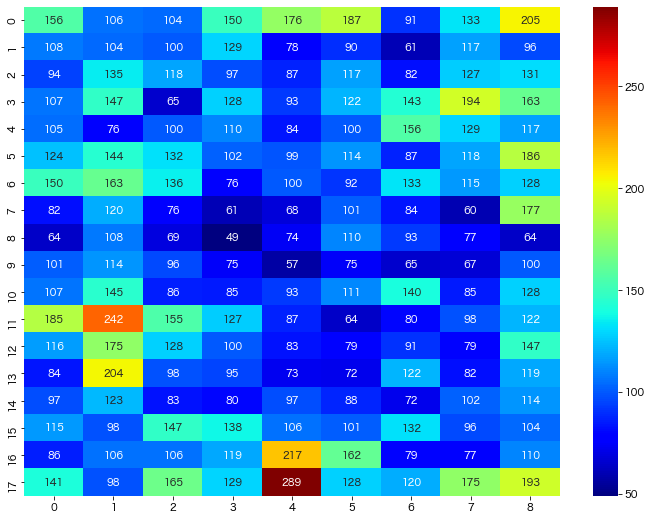

In [187]:
plt.figure(figsize=(12, 9))
sns.heatmap(heat_map_data, annot=True, fmt='g', cmap='jet')

###  中に入っている単語を確認

In [190]:
row = 11
col = 2
word_map_df[(word_map_df['row']==row)&(word_map_df['col']==col)]

,row,col
源,11,2
達する,11,2
浄化,11,2
放射能,11,2
注入,11,2
...,...,...
あずける,11,2
蒸着,11,2
硬さ,11,2
防腐剤,11,2


In [163]:
word_map_df.to_csv('../output/word_map.csv', index=True)

In [164]:
pd.read_csv('../output/word_map.csv', index_col=0)

,row,col
*,9,4
する,15,0
いる,0,0
れる,8,4
こと,1,0
...,...,...
小男,9,2
面下,11,2
お引越し,9,4
冠する,15,1
